In [3]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
print(os.listdir("../input"))


['list_bbox_celeba.csv', 'list_eval_partition.csv', 'list_landmarks_align_celeba.csv', 'list_attr_celeba.csv', 'img_align_celeba']


In [ ]:
 #!pip install tensorflow=='2.0.0-alpha0'

In [4]:
import pandas as pd
import numpy as np
import cv2    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from time import time
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from PIL import Image
from io import BytesIO
import base64
from keras.utils import np_utils

from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation 

from keras.models import Sequential, Model 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from IPython.core.display import display, HTML


from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard 

plt.style.use('ggplot')

%matplotlib inline

Using TensorFlow backend.


In [5]:
import tensorflow as tf
print(tf.__version__)

1.13.1


In [6]:
main_folder = '../input/'
images_folder = main_folder + 'img_align_celeba/img_align_celeba/'

EXAMPLE_PIC = images_folder + '000225.jpg'


In [7]:
# import the data set that include the attribute for each picture
data = pd.read_csv(main_folder + 'list_attr_celeba.csv')
data.set_index('image_id', inplace=True)
data.replace(to_replace=-1, value=0, inplace=True) #replace -1 by 0
data.shape

(202599, 40)

In [ ]:
EXAMPLE_PIC

In [ ]:
img = load_img(EXAMPLE_PIC)
plt.grid(False)
plt.imshow(img)
data.loc[EXAMPLE_PIC.split('/')[-1]][['Attractive','Male','Young']] #some attributes

In [ ]:
data.isna().sum()

In [ ]:
data.isnull().sum()

In [ ]:
plt.title('Attractiveness')
sns.countplot(y='Attractive', data=data, color="c")
plt.show()

In [ ]:
plt.title('Gender')
sns.countplot(y='Male', data=data, color="c")
plt.show()

In [ ]:
plt.title('Age')
sns.countplot(y='Young', data=data, color="c")
plt.show()

In [ ]:
plt.title('Lipstick')
sns.countplot(y='Wearing_Lipstick', data=data, color="c")
plt.show()

In [ ]:
corr = data.corr()
sns.heatmap(corr)

In [ ]:
corr

In [8]:
y = data["Attractive"]
X = data.drop(['Attractive'], axis=1)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
X_train.shape, X_test.shape

# METHODS 


## Only using the csv

### First Neural network

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(64, input_dim=39, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(X_test, Y_test, batch_size=128)

In [ ]:
model.history

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

In [ ]:
predictions = model.predict(X_test)


### Second Neural network

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(64, input_dim=39, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(X_test, Y_test, batch_size=128)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

## Using the images

In [10]:
df_partition = pd.read_csv(main_folder + 'list_eval_partition.csv')
df_partition.head()

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


In [11]:
df_partition.set_index('image_id', inplace=True)
df_par_attr = df_partition.join(data['Attractive'], how='inner')
df_par_attr.head()

,partition,Attractive
image_id,,
000001.jpg,0,1
000002.jpg,0,0
000003.jpg,0,0
000004.jpg,0,1
000005.jpg,0,1


In [12]:
x_data = []
y_data = []

for index, target in df_par_attr.iterrows():
    im = cv2.imread(images_folder + index)
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (50, 50)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)
    x_data.append(im)
    y_data.append(df_par_attr['Attractive'])


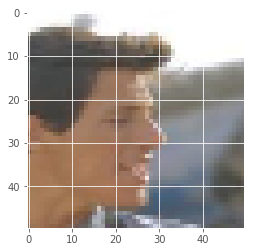

In [13]:
plt.imshow(x_data[2][0])
plt.show()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

In [1]:
x_train.shape, x_test.shape

NameError: name 'x_train' is not defined

In [ ]:
y_train.shape, y_test.shape

In [34]:
first_model = tf.keras.Sequential()
first_model.add(Flatten(input_shape=(50, 50)))
first_model.add(Dense(64, activation='sigmoid'))
first_model.add(Dense(10, ))
first_model.compile(optimizer = 'sgd',
                    loss = 'sparse_categorical_crossentropy',
                    metrics = ['accuracy'])

In [35]:
model_history = first_model.fit(x = x_train,
                                y = y_train,
                                batch_size = 128,
                                epochs = 5,
                                validation_split = 0.2,
                                shuffle=True)

ValueError: Error when checking input: expected flatten_10_input to have 3 dimensions, but got array with shape (1, 50, 50, 3)